In [9]:
# import neccessary libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# data visualization setting

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)

In [11]:
# load the csv dataset using pd

df = pd.read_csv('datasets/Loan_default.csv')

In [12]:
# overview of data

print(df.head())
print(df.describe())
print(df.info())
print(df.shape)


       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [13]:
# check for duplicates and nulls

df.duplicated().sum()
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

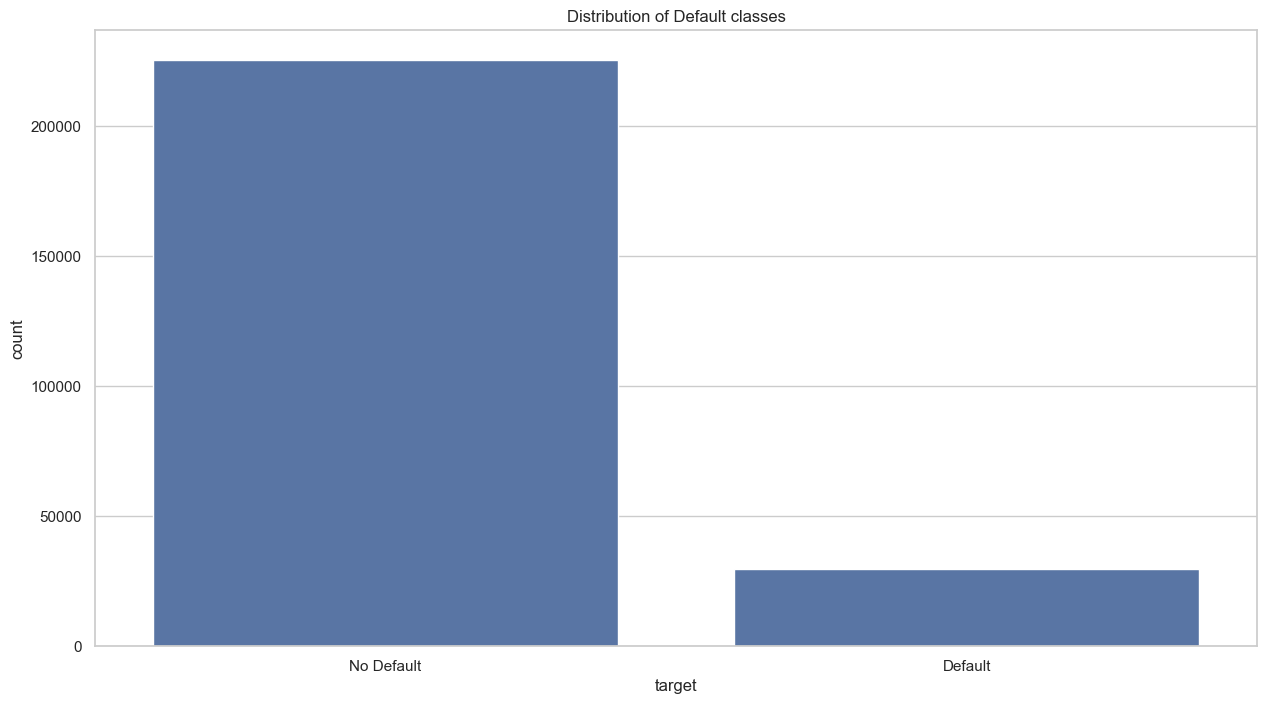

In [15]:
# countplot of default classes

sns.countplot(x='Default', data=df)
plt.xlabel('target')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title("Distribution of Default classes")
plt.show()


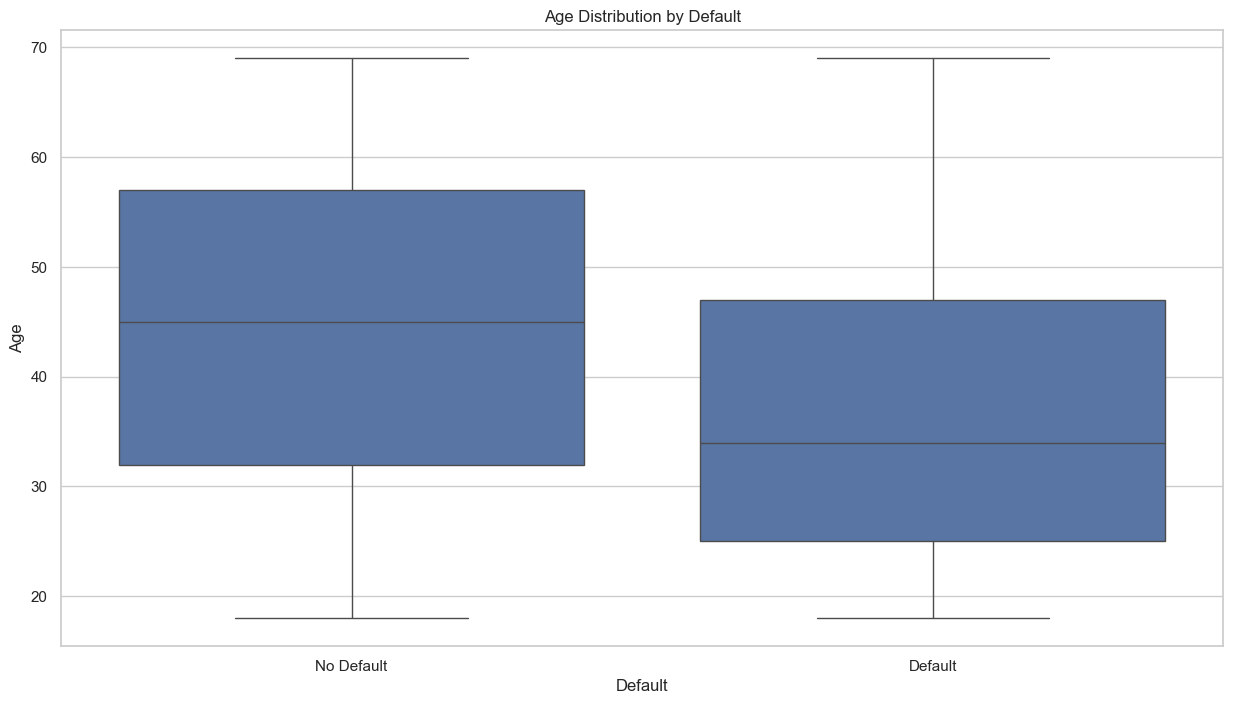

In [17]:
# boxplot to show age distribution by default

sns.boxplot(x='Default', y='Age', data=df)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title('Age Distribution by Default')
plt.show()


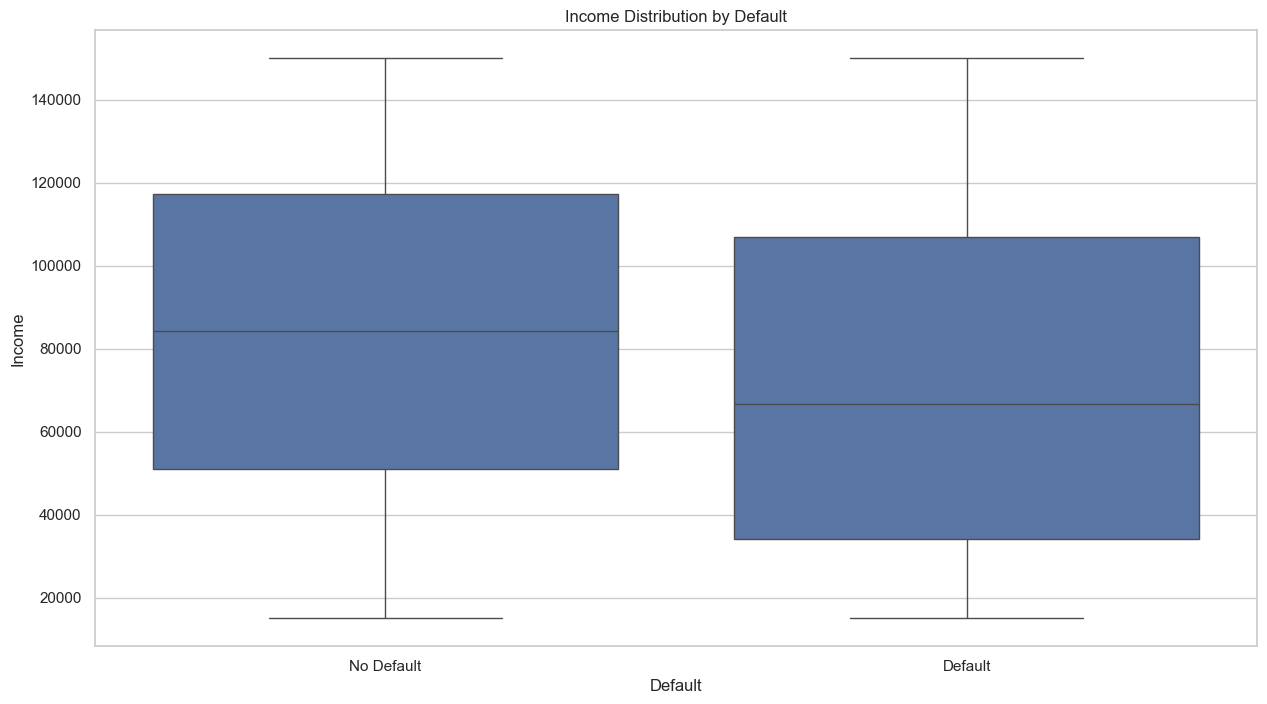

In [18]:
# boxplot to show income distribution by default

sns.boxplot(x='Default', y='Income', data=df)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title('Income Distribution by Default')
plt.show


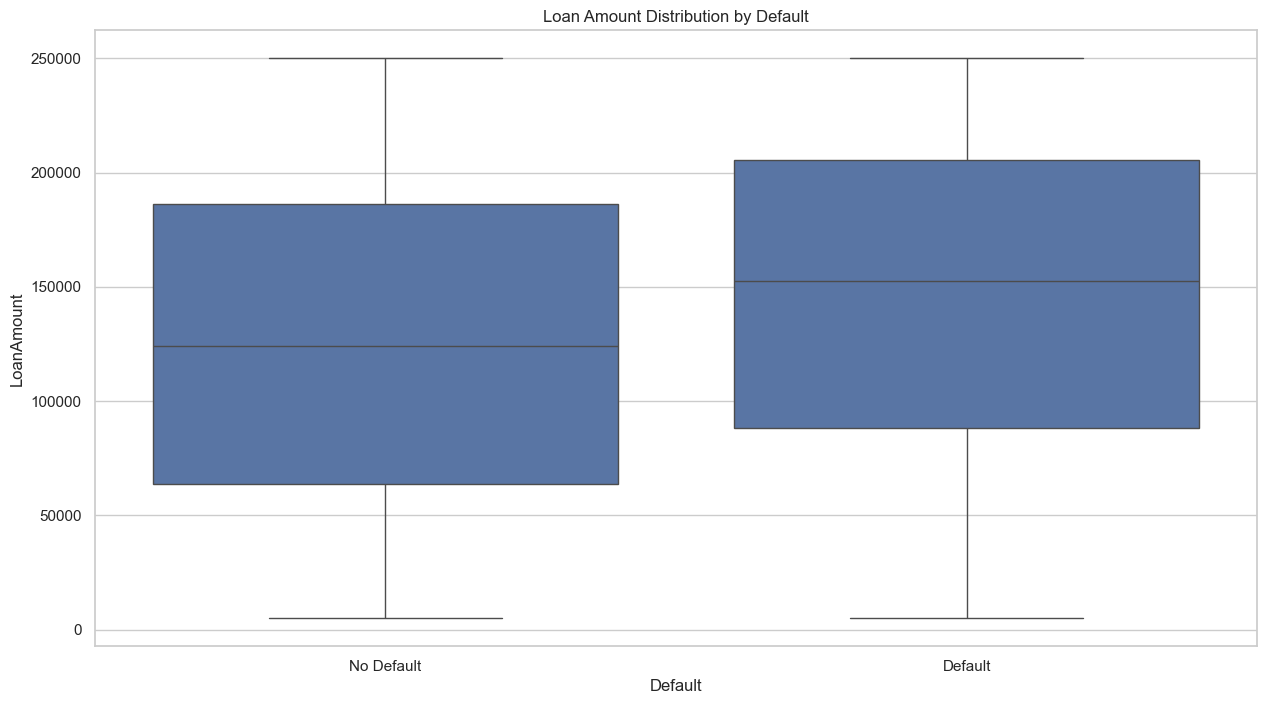

In [20]:
# boxplot to show loan amount distribution by default

sns.boxplot(x='Default', y='LoanAmount', data=df)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title('Loan Amount Distribution by Default')
plt.show()


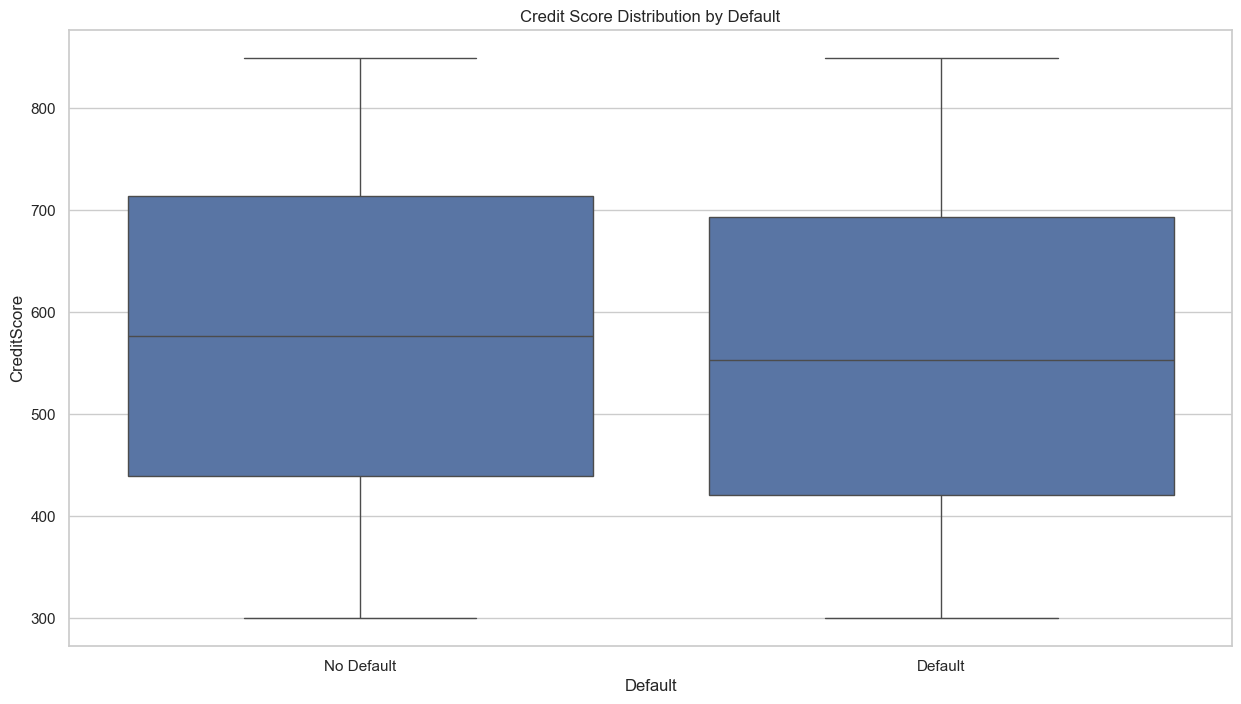

In [21]:
# boxplot to show credit score distribution by default

sns.boxplot(x='Default', y='CreditScore', data=df)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title('Credit Score Distribution by Default')
plt.show()


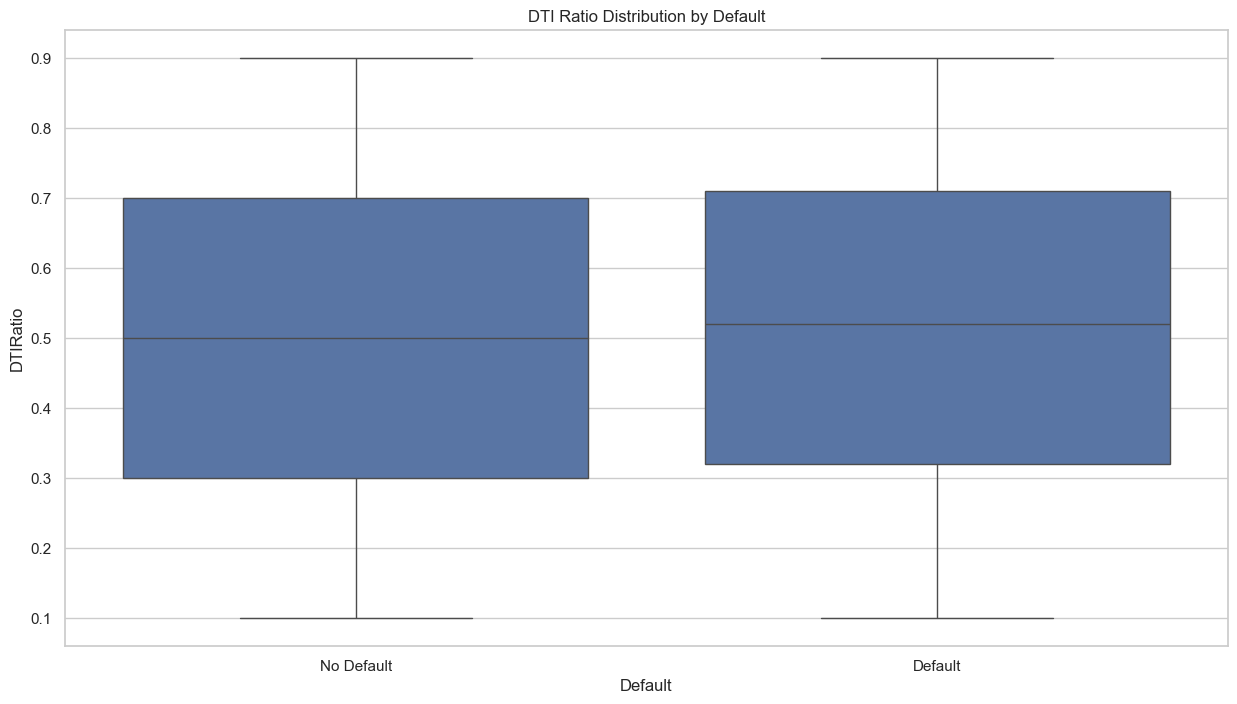

In [22]:
# boxplot to show dti ratio distribution by default

sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.xticks([0, 1], ['No Default', 'Default'])
plt.title('DTI Ratio Distribution by Default')
plt.show()


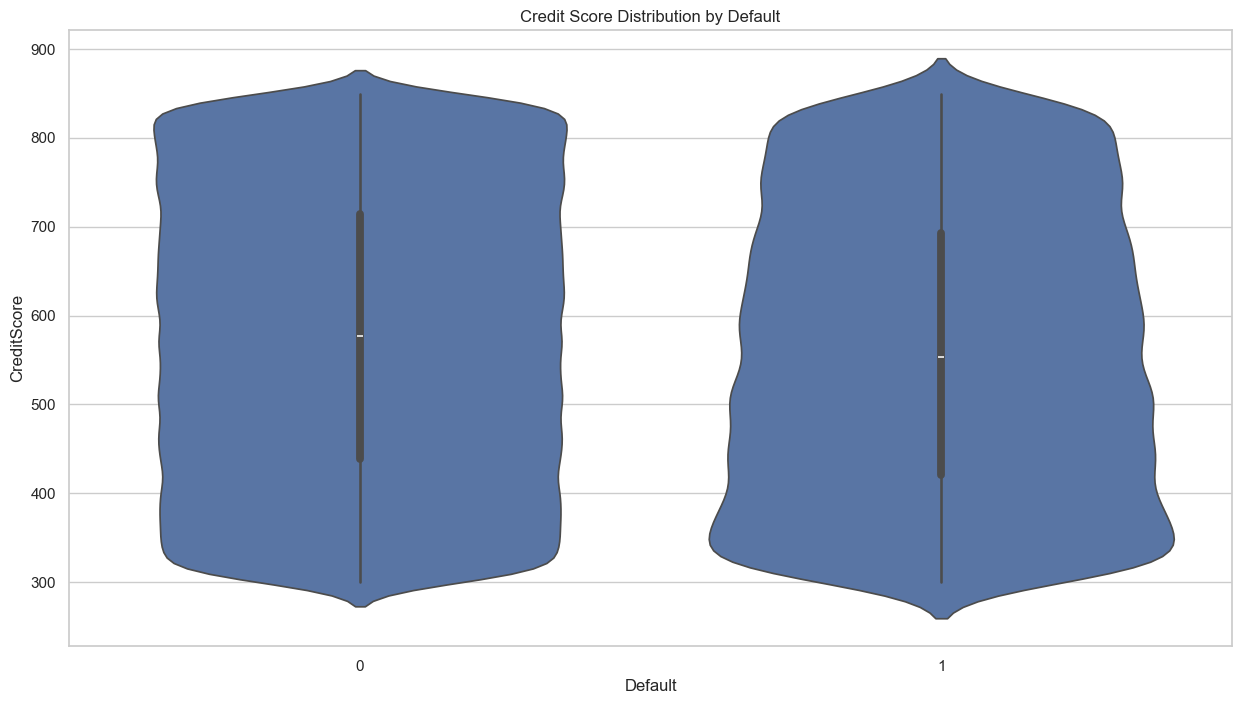

In [23]:
# violin plot to show credit score distribution and density by default

sns.violinplot(x='Default', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Default')
plt.show()


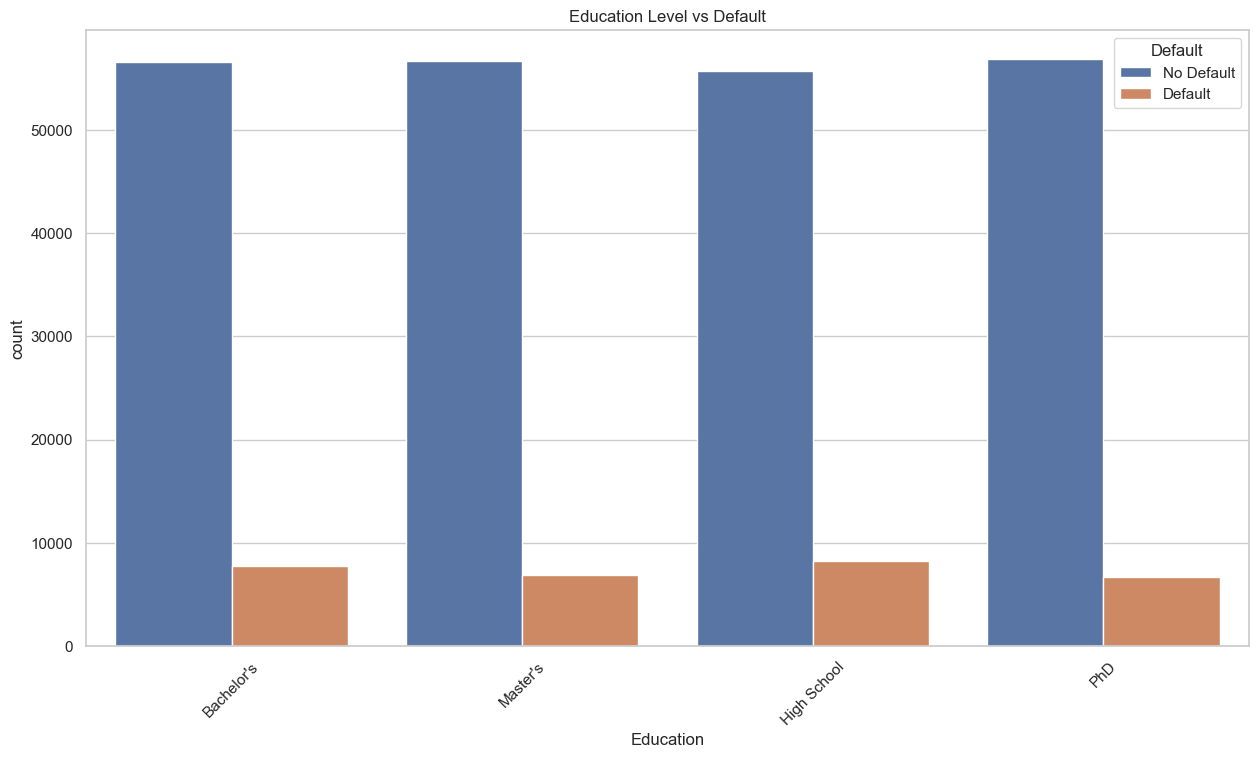

In [25]:
# bar plot for education vs default

sns.countplot(x='Education', hue='Default', data=df)
plt.title('Education Level vs Default')
plt.xticks(rotation=45)
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()


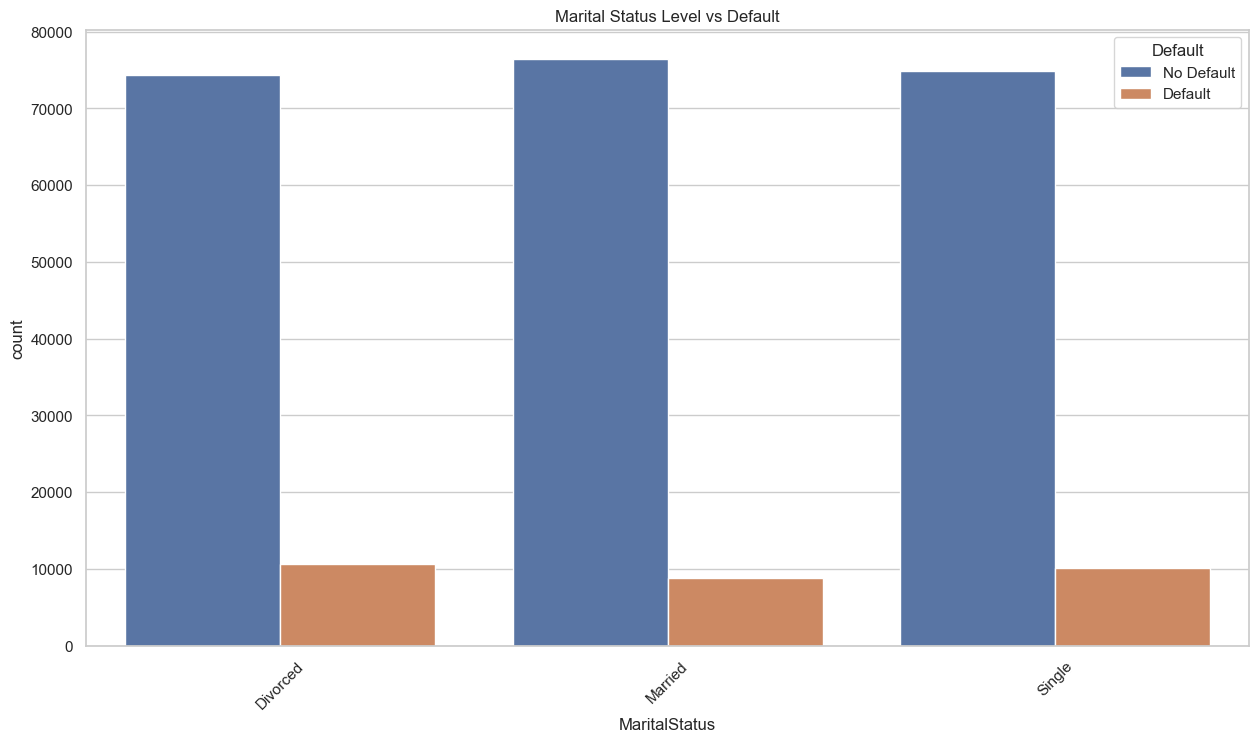

In [27]:
# bar plot for marital status vs default

sns.countplot(x='MaritalStatus', hue='Default', data=df)
plt.title('Marital Status Level vs Default')
plt.xticks(rotation=45)
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()


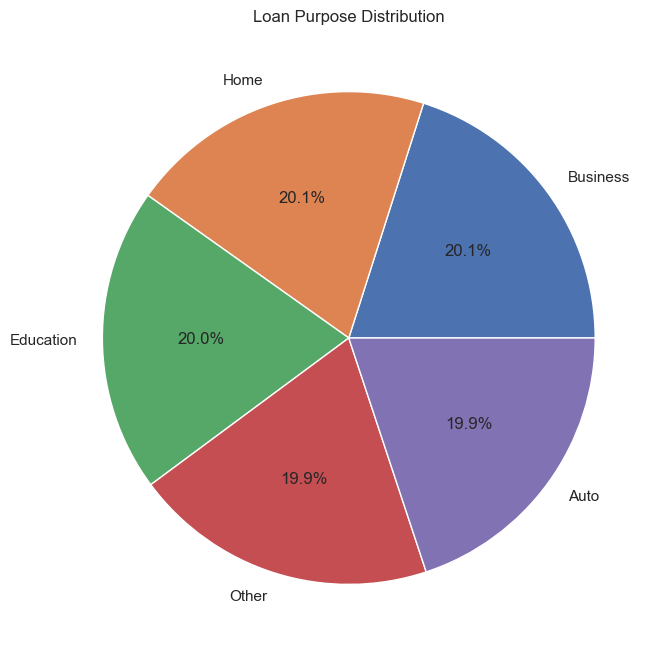

In [28]:
# pie chart for loan purpose distribution

df['LoanPurpose'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loan Purpose Distribution')
plt.ylabel('')
plt.show()


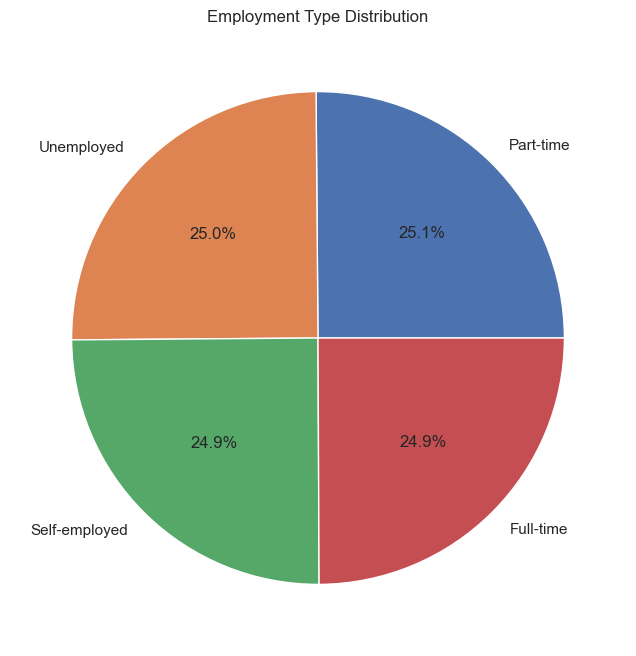

In [29]:
# pie chart for employment type distribution

df['EmploymentType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Employment Type Distribution')
plt.ylabel('')
plt.show()


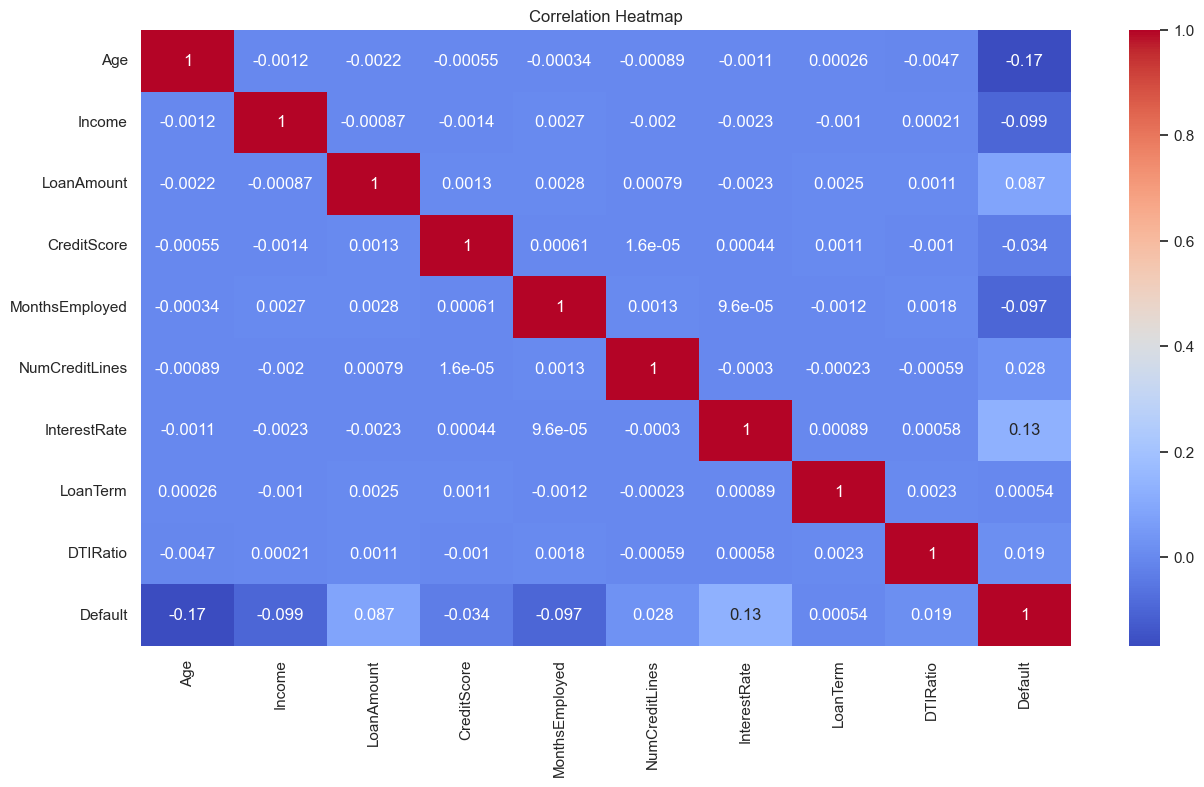

In [30]:
# heatmap of correlations for only numeric features

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [33]:
# seperate the feature and target variables

X = df.drop(columns=["Default", "LoanID"], axis=1)
y = df["Default"]


In [34]:
# split dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# encode categorical variables 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

onehot_feat = ["EmploymentType", "MaritalStatus", "LoanPurpose", "HasCoSigner"]
ordinal_feat = ["HasMortgage", "HasDependents", "Education"]

ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), onehot_feat),
                  ('ordinal', OrdinalEncoder(), ordinal_feat)
],
    remainder='passthrough'
)

In [40]:
# build the pipeline

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', ct),
    ('clf', RandomForestClassifier(n_jobs=2, random_state=0, class_weight='balanced'))
])


In [41]:
# train the pipeline on training data

pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...), ('ordinal', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
# evaluate the test set

y_pred = pipeline.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], shape=(76605,))